In [2]:
from transCSSR import *
import matplotlib.pyplot as plt

import graphviz
from sklearn.metrics import log_loss

import itertools

In [24]:
for i in range(1,137):        
    data_prefix = ''
    Yt_name = ('user%s' % i)
    Xt_name = ''

    machine_fname = '+.dot'
    transducer_fname = '+{}.dot'.format(Yt_name)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    stringYs = open(('CSSR-Data/cssrData-%s.txt' % i).format(data_prefix, Yt_name)).readlines()

    stringY = ""

    for y in stringYs:
        stringY += y.strip()
    

    if Xt_name == '':
        stringX = '0'*len(stringY)
    else:
        stringX = open(('CSSR-Data/cssrData-%s.txt' % i).format(data_prefix, Xt_name)).readline().strip()
    
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    axs = ['0']
    ays = ['0', '1']

    e_symbols = list(itertools.product(axs, ays)) # All of the possible pairs of emission
                                              # symbols for (x, y)

    alpha = 0.001

    verbose = False

    # L is the maximum amount we want to ever look back.

    L_max = 15

    inf_alg = 'transCSSR'

    Tx = len(stringX); Ty = len(stringY)

    assert Tx == Ty, 'The two time series must have the same length.'

    T = Tx

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    model_selection_output = choose_L_eM(stringX, stringY, L_max, axs, ays, e_symbols, Xt_name, Yt_name, alpha = 0.001, test_type = 'chi2', fname = None, is_multiline = False, verbose = True, all_digits = True)

In [25]:
model_selection_output

{'epsilon': {('', ''): 0, ('0', '0'): 0, ('0', '1'): 0},
 'invepsilon': defaultdict(dict,
             {0: {('', ''): True, ('0', '0'): True, ('0', '1'): True}}),
 'morph_by_state': {0: [39568, 80]},
 'L_opt': 1,
 'bic_by_L': [1163.3493305660847,
  1163.349330617082,
  1163.3493307700721,
  1163.349331025085,
  1201.2050260211172,
  1201.1912721293747,
  1201.1912726870082,
  1241.4305871589142,
  1209.6565599150692,
  1257.099688085579,
  1344.9222784407707,
  1344.9222794880525,
  1344.9222806272214,
  1344.9222818582803,
  1344.922283181234],
 'num_states_by_L': [1, 1, 1, 1, 6, 6, 6, 10, 7, 13, 23, 23, 23, 23, 23]}

Text(0, 0.5, 'BIC(L)')

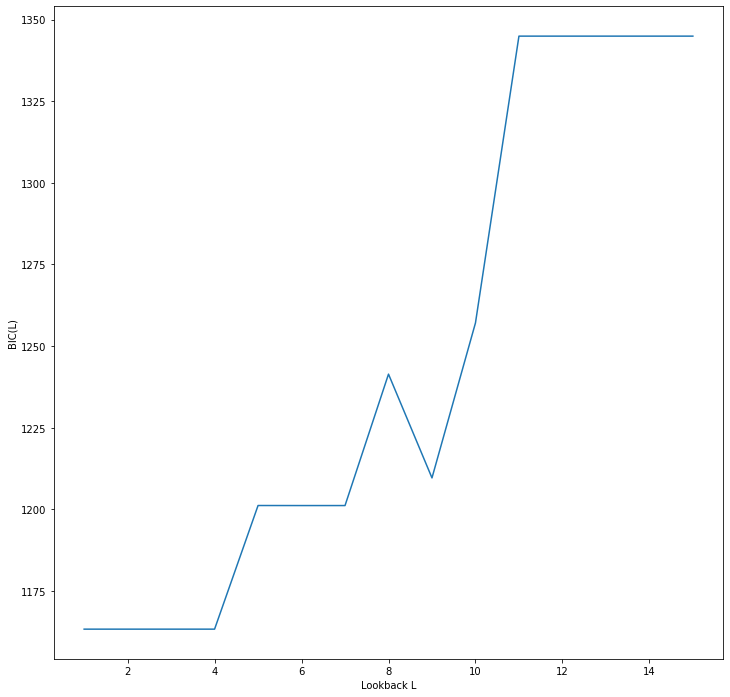

In [26]:
plt.figure(figsize=(12,12))
plt.plot(range(1, len(model_selection_output['bic_by_L'])+1), model_selection_output['bic_by_L'])
plt.xlabel('Lookback L')
plt.ylabel('BIC(L)')